# Group 9 Project: Correlation between U.S. Presidential Polls and Equity Markets (as of Sept 2020)

### Hypothesis:

> Markets have been on an uptick and continue to keep momentum as we draw near to the US Presidential elections. Polls, like markets, are sentiment-based and we expect to see investor sentiments reflected in polls and vice versa. 

> As such, for this project, we wish to verify if the US Presidential polls have explanatory value for the S&P stock market performance. In particular, we started off with the hypothesis that the incumbent's poll rates will be more likely to correlate with stock markets, i.e. Donald Trump's likelihood to win/lose may be more linked to stock markets.


### Methodology:

> In terms of the X-variable, we set this as poll results. For the Y-variable, we set this as the stock market performance. For the X-variable, we are looking specifically at the top Democrat and Republican candidate, e.g. Donald Trump and Joe Biden. 
> In terms of data sets, we look at data from the S&P markets, as well as poll data from Kaggle which is cross-checked with live poll data from Financial Times. We chose to look at S&P due to the focus on stocks in the United States. 
> To reduce the chances of spurious correlation, we also looked at two highly possible confounders for the correlation between . These are (1) the tendency of stock markets to show seasonal fluctuations and (2) impact of the unprecedented COVID on stock markets. 


### Findings: 
> Contrary to expectation, we concluded that there is actually a stronger correlation between the opposition candidate, as opposed to the incumbent, with the stock market. 
> In addition, we also controlled for the seasonality effect on stock markets through programming functions. Thereafter, we also proved that the impact of COVID on stock markets can be nullified, by showing that the incremental rate of infections normalises into a flatline over time. 
> To control for these two factors, we focused our analysis on May 2020 to date.  


In [1]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime


## (1) Stock Market Performance 

> In this segment, we look at stock performance from the S&P Index and also control for the seasonality effect. This sets the stage for us to layer on the comparison with poll results of Trump and Biden. 

In [2]:
start=datetime.date(2019,11,3)
end=datetime.date(2020,11,3)
sp_500_df=web.DataReader("SPY","yahoo",start,end).reset_index()

In [3]:
sp_500_df.describe()

High         Low        Open       Close        Volume  \
count  226.000000  226.000000  226.000000  226.000000  2.260000e+02   
mean   312.775266  307.533318  310.220796  310.299912  1.013882e+08   
std     24.375441   27.004737   25.906669   25.724063  7.270401e+07   
min    229.679993  218.259995  228.190002  222.949997  2.027000e+07   
25%    302.535004  295.487495  298.067490  297.902504  5.453205e+07   
50%    316.699997  313.214996  314.599991  314.400009  7.578110e+07   
75%    329.439987  325.905006  327.440002  327.882507  1.177690e+08   
max    358.750000  353.429993  355.869995  357.700012  3.922207e+08   

        Adj Close  
count  226.000000  
mean   307.203979  
std     25.742265  
min    221.088181  
25%    294.835838  
50%    310.895493  
75%    324.332977  
max    356.273865

In [4]:
sp_500_df.head()

Date        High         Low        Open       Close      Volume  \
0 2019-11-04  308.000000  306.959991  307.850006  307.369995  60606900.0   
1 2019-11-05  307.920013  306.709991  307.589996  307.029999  42933200.0   
2 2019-11-06  307.399994  306.059998  307.029999  307.100006  46487100.0   
3 2019-11-07  309.649994  307.660004  308.570007  308.179993  54272300.0   
4 2019-11-08  309.000000  307.029999  307.799988  308.940002  49032100.0   

    Adj Close  
0  301.538818  
1  301.205261  
2  301.273926  
3  302.333466  
4  303.079071

### Data Wrangling

In [5]:
sp_500_df.isna().sum() # Maybe we can use this line?

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
sp_500_df=sp_500_df.dropna()
sp_500_df.describe()
# this means our SP500 dont have NAN

High         Low        Open       Close        Volume  \
count  226.000000  226.000000  226.000000  226.000000  2.260000e+02   
mean   312.775266  307.533318  310.220796  310.299912  1.013882e+08   
std     24.375441   27.004737   25.906669   25.724063  7.270401e+07   
min    229.679993  218.259995  228.190002  222.949997  2.027000e+07   
25%    302.535004  295.487495  298.067490  297.902504  5.453205e+07   
50%    316.699997  313.214996  314.599991  314.400009  7.578110e+07   
75%    329.439987  325.905006  327.440002  327.882507  1.177690e+08   
max    358.750000  353.429993  355.869995  357.700012  3.922207e+08   

        Adj Close  
count  226.000000  
mean   307.203979  
std     25.742265  
min    221.088181  
25%    294.835838  
50%    310.895493  
75%    324.332977  
max    356.273865

In [7]:
sp_500_df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [8]:
sp_500_df.set_index("Date",inplace=True)


In [9]:
daily_close_px=sp_500_df["Close"]

## Data visualization

In [10]:
import plotly.graph_objs as go
closing_overtime = go.Scatter(x = sp_500_df.index, y = daily_close_px)
go.Figure(closing_overtime)

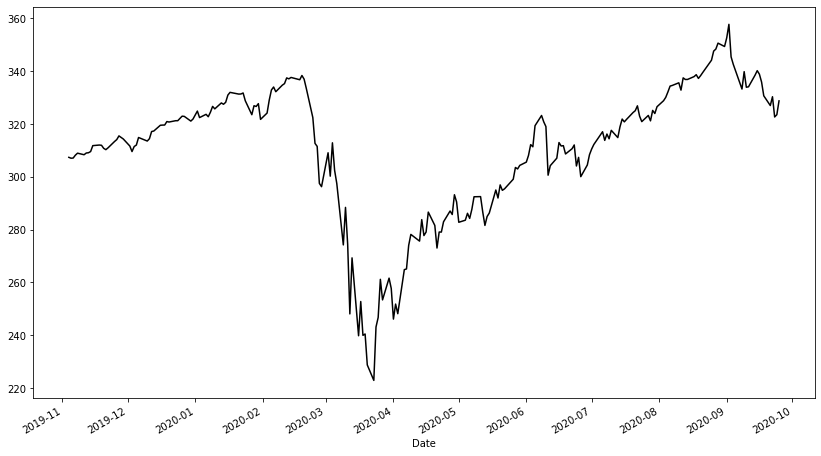

In [11]:
ax=daily_close_px.plot(figsize=(14,8),color="black")

Text(2020-06, 260, 'reasonable logic start point')

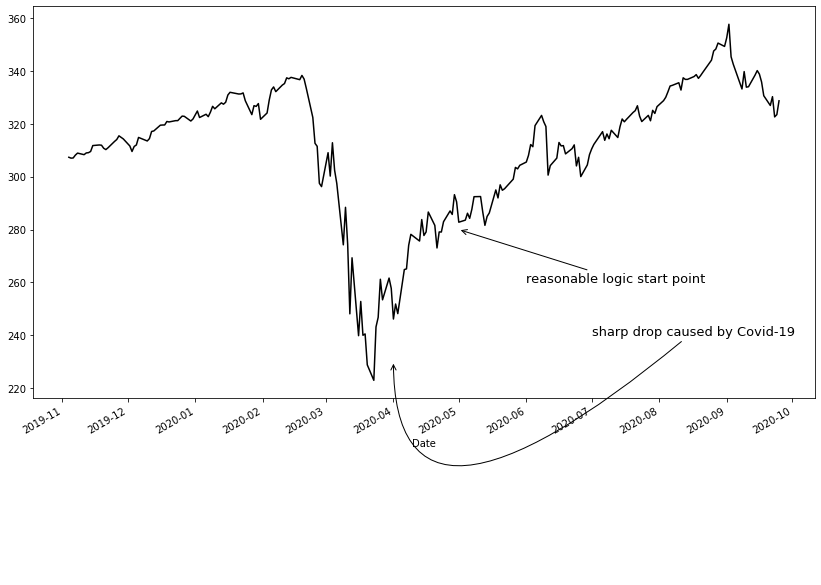

In [12]:


ax=daily_close_px.plot(figsize=(14,8),color="black")

ax.annotate("sharp drop caused by Covid-19",xy=("2020-04",230),xytext=("2020-07",240),size=13,arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=40,angleB=-90"))
ax.annotate("reasonable logic start point",xy=("2020-05",280),xytext=("2020-06",260),size=13,arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

In [13]:
daily_close_px=daily_close_px.reset_index()

In [14]:
daily_close_px_fromay=daily_close_px.iloc[123:]

### there is a sharp drop for Covid-19

## Testing the seasonality of SP500

spring：3.21-6.21 index[95:158]
summer：6.22-9.22 index[158:]

winter：12.22-3.20 index[0:95]


In [15]:
pd.set_option("display.max_rows",300)
sp_500_df.head

<bound method NDFrame.head of                   High         Low        Open       Close       Volume  \
Date                                                                      
2019-11-04  308.000000  306.959991  307.850006  307.369995   60606900.0   
2019-11-05  307.920013  306.709991  307.589996  307.029999   42933200.0   
2019-11-06  307.399994  306.059998  307.029999  307.100006   46487100.0   
2019-11-07  309.649994  307.660004  308.570007  308.179993   54272300.0   
2019-11-08  309.000000  307.029999  307.799988  308.940002   49032100.0   
2019-11-11  308.540009  307.269989  307.420013  308.350006   35797300.0   
2019-11-12  309.989990  308.149994  308.750000  309.000000   46484600.0   
2019-11-13  309.540009  307.660004  307.910004  309.100006   53917700.0   
2019-11-14  309.640015  308.089996  308.790009  309.549988   51219900.0   
2019-11-15  311.839996  310.260010  311.019989  311.790009   62023600.0   
2019-11-18  312.279999  311.029999  311.529999  312.019989   49228000.

### We only have three seasons. We may need previous data to analyze the seasonality, so I want to expand the time span and analyze the seasonality.

In [16]:
start2=datetime.date(2015,11,3)
sp500_5year_df=web.DataReader("SPY","yahoo",start2,end).reset_index()

### test the stationarity of time series

In [17]:
import statsmodels.tsa.stattools as ts

In [18]:

def judge_stationarity(data_sanya_one):
    dftest = ts.adfuller(data_sanya_one)
    print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    stationarity = 1
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value 
        if dftest[0] > value:
                stationarity = 0
    print(dfoutput)
    print("whether_stationary(1/0): %d" %(stationarity))
    return stationarity


In [19]:
sp500_px_series=pd.DataFrame([sp500_5year_df["Close"]]).T
sp500_px_series.index=sp500_5year_df["Date"]
sp500_px_series

Close
Date                  
2015-11-02  210.389999
2015-11-03  211.000000
2015-11-04  210.360001
2015-11-05  210.149994
2015-11-06  210.039993
...                ...
2020-09-21  326.970001
2020-09-22  330.299988
2020-09-23  322.640015
2020-09-24  323.500000
2020-09-25  328.730011

[1234 rows x 1 columns]

In [20]:
stationarity=judge_stationarity(sp500_px_series)

(-1.4448347444210354, 0.5606032151882493, 9, 1224, {'1%': -3.4357038129673962, '5%': -2.8639042041471887, '10%': -2.5680287376916997}, 6109.499569659325)
Test Statistic                   -1.444835
p-value                           0.560603
#Lags Used                        9.000000
Number of Observations Used    1224.000000
Critical Value (1%)              -3.435704
Critical Value (5%)              -2.863904
Critical Value (10%)             -2.568029
dtype: float64
whether_stationary(1/0): 0


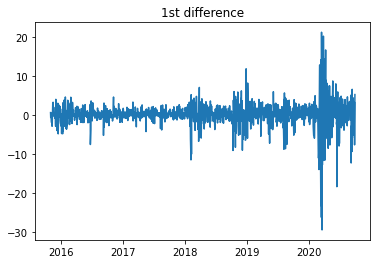

In [21]:
if stationarity == 0:
    sp500_px_series_diff = sp500_px_series.diff()
    sp500_px_series_diff = sp500_px_series_diff.dropna()
    plt.figure()
    plt.plot( sp500_px_series_diff)
    plt.title("1st difference")
    plt.show()


In [22]:
judge_stationarity(sp500_px_series_diff)

(-10.238634832042296, 4.814490985259432e-18, 8, 1224, {'1%': -3.4357038129673962, '5%': -2.8639042041471887, '10%': -2.5680287376916997}, 6105.373144125409)
Test Statistic                -1.023863e+01
p-value                        4.814491e-18
#Lags Used                     8.000000e+00
Number of Observations Used    1.224000e+03
Critical Value (1%)           -3.435704e+00
Critical Value (5%)           -2.863904e+00
Critical Value (10%)          -2.568029e+00
dtype: float64
whether_stationary(1/0): 1


1

### now our series is stationary enough for seasonality test

In [23]:
sp500_px_series_diff.dtypes

Close    float64
dtype: object

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sp500_px_series_diff,period=28)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [25]:
stationarity = judge_stationarity(residual.dropna())

(-11.795988363031688, 9.57672214535764e-22, 23, 1181, {'1%': -3.4358991704737245, '5%': -2.863990392722102, '10%': -2.568074638859274}, 5789.847583632831)
Test Statistic                -1.179599e+01
p-value                        9.576722e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.181000e+03
Critical Value (1%)           -3.435899e+00
Critical Value (5%)           -2.863990e+00
Critical Value (10%)          -2.568075e+00
dtype: float64
whether_stationary(1/0): 1


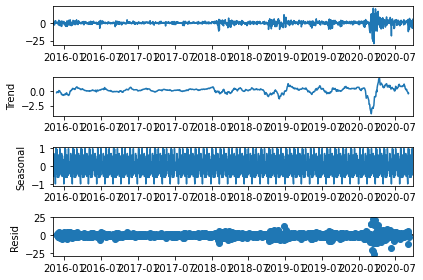

<Figure size 1440x720 with 0 Axes>

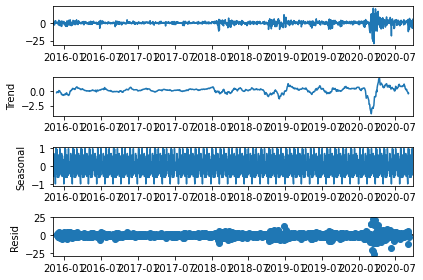

In [26]:
plt.figure(figsize=(20,10))
decomposition.plot()

### Now, we can conclude that our data has seasonality

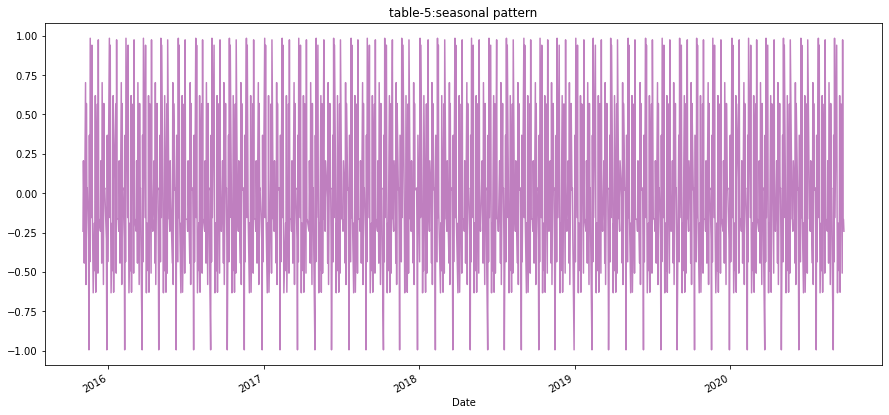

In [27]:
plt.figure(figsize=(15,7))
plt.title("table-5:seasonal pattern")
plt.xlabel("Time")  
decomposition.seasonal.plot(color="purple",alpha=0.5)


### as we can see on table-5,SP500 has apparently cyclicity,but we want to decompose it and see the real trend,
### here we go

[]

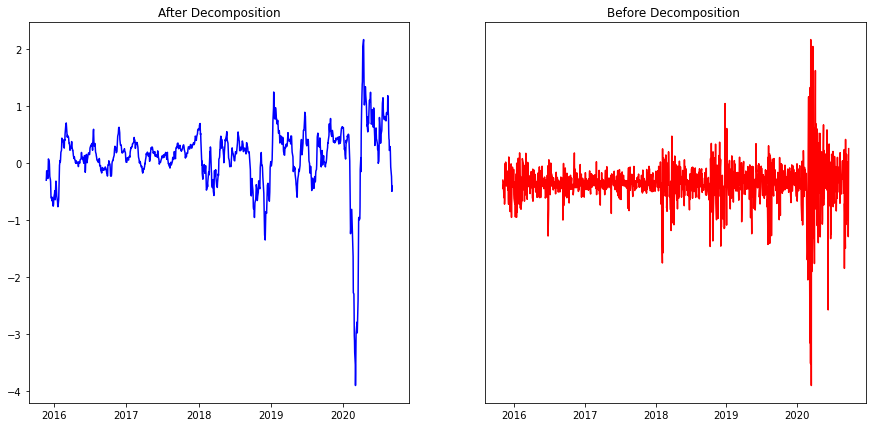

In [28]:
plt.figure(figsize=(15,7))
ax1=plt.subplot(121)
ax1.plot(trend,color="blue")
plt.title("After Decomposition")
ax2=plt.subplot(122)
ax2.plot(sp500_px_series_diff,color="red")
plt.title("Before Decomposition ")
ax2.set_yticks([])

In [29]:
type(trend)

pandas.core.series.Series

In [30]:
trend

Date
2015-11-03   NaN
2015-11-04   NaN
2015-11-05   NaN
2015-11-06   NaN
2015-11-09   NaN
              ..
2020-09-21   NaN
2020-09-22   NaN
2020-09-23   NaN
2020-09-24   NaN
2020-09-25   NaN
Name: trend, Length: 1233, dtype: float64

In [31]:
decomposed=pd.DataFrame(trend)
decomposed=decomposed.fillna(method="ffill").dropna()
decomposed.head()

trend
Date                
2015-11-23 -0.296607
2015-11-24 -0.239822
2015-11-25 -0.133036
2015-11-27 -0.130357
2015-11-30 -0.236428

In [32]:
type(decomposed)

pandas.core.frame.DataFrame

In [33]:
##let's extract the time period we are mostly interested(2019-11-3~2020-11-3(its the election day))
decomposed_oneyear=pd.concat([decomposed["2019-11"],decomposed["2019-12"],decomposed["2020-1"],decomposed["2020-2"],decomposed["2020-3"],
decomposed["2020-4"],decomposed["2020-5"],decomposed["2020-6"],decomposed["2020-7"],decomposed["2020-8"],
decomposed["2020-9"]])

In [34]:

closing_overtime_decomposed = go.Scatter(x = decomposed_oneyear.index, y = decomposed_oneyear.trend)
go.Figure(closing_overtime_decomposed)

Text(2020-06, -1, 'reasonable logic start point')

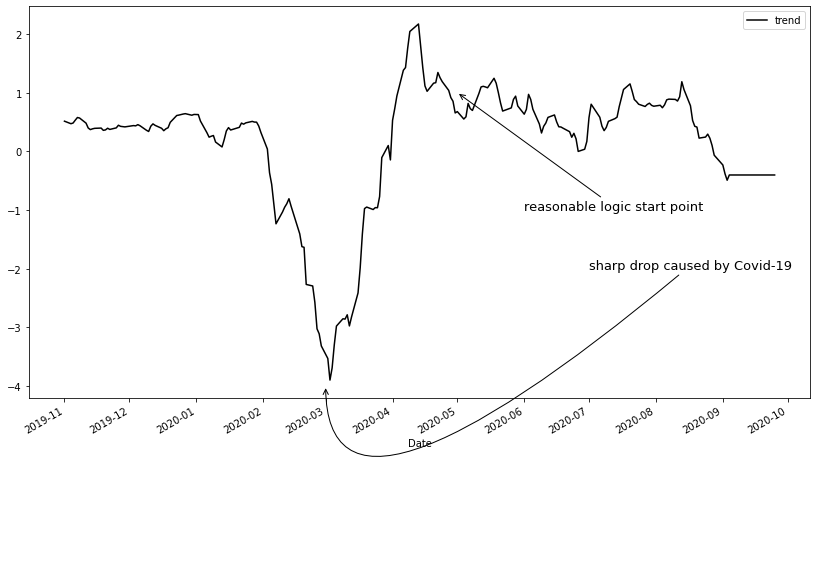

In [35]:
ax=decomposed_oneyear.plot(figsize=(14,8),color="black")
ax.annotate("sharp drop caused by Covid-19",xy=("2020-03",-4),xytext=("2020-07",-2),size=13,arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=40,angleB=-90"))
ax.annotate("reasonable logic start point",xy=("2020-05",1),xytext=("2020-06",-1),size=13,arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

### the effect of Covid19 is so big ,so we must rule out it.Trend after 2020-05 seems more reasonable and stable.

## (2) Poll Data 

In [36]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import webbrowser
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as r
from datetime import datetime
from scipy import stats

### How Biden and Trump are doing in the national polls

In [37]:
url = "https://ig.ft.com/us-election-2020/"  #Status from Financial Times

response = requests.get(url)

response.status_code

200

In [38]:
page = response.text
soup = bs(page)

In [39]:
Poll_Image=soup.find(class_ = "g-imageset").find('img')['srcset']
Poll_Image

'https://ig.ft.com/autograph/graphics/us-2020-polltracker-ig.svg?frame=webM'

> Figure current active poll data 

> Lines represent weighted averages, points represent polls (%)

In [40]:
webbrowser.open(Poll_Image)

True

In [41]:
Poll=pd.read_csv('president_polls.csv')

In [42]:
Poll.head()

question_id  poll_id  cycle     state  pollster_id  \
0       129586    69556   2020       NaN         1610   
1       129586    69556   2020       NaN         1610   
2       129587    69556   2020       NaN         1610   
3       129587    69556   2020       NaN         1610   
4       129589    69557   2020  Missouri         1056   

                         pollster sponsor_ids        sponsors  \
0  USC Dornsife/Los Angeles Times         NaN             NaN   
1  USC Dornsife/Los Angeles Times         NaN             NaN   
2  USC Dornsife/Los Angeles Times         NaN             NaN   
3  USC Dornsife/Los Angeles Times         NaN             NaN   
4        Remington Research Group         421  Missouri Scout   

               display_name  pollster_rating_id  ...     created_at  \
0              USC Dornsife               343.0  ...  9/19/20 06:08   
1              USC Dornsife               343.0  ...  9/19/20 06:08   
2              USC Dornsife               343.0  ...  9/19/20 06:08   
3              USC Dornsife               343.0  ...  9/19/20 06:08   
4  Remington Research Group               279.0  ...  9/19/20 09:18   

                           notes  \
0  probabilistic voting question   
1  probabilistic voting question   
2    traditional voting question   
3    traditional voting question   
4                            NaN   

                                                 url    stage race_id answer  \
0                          https://election.usc.edu/  general    6210  Biden   
1                          https://election.usc.edu/  general    6210  Trump   
2                          https://election.usc.edu/  general    6210  Biden   
3                          https://election.usc.edu/  general    6210  Trump   
4  https://moscout.com/s/MOSCOUT-Statewide-091820...  general    6235  Biden   

  candidate_id       candidate_name  candidate_party    pct  
0        13256  Joseph R. Biden Jr.              DEM  50.26  
1        13254         Donald Trump              REP  42.73  
2        13256  Joseph R. Biden Jr.              DEM  50.69  
3        13254         Donald Trump              REP  43.17  
4        13256  Joseph R. Biden Jr.              DEM  45.00  

[5 rows x 38 columns]

In [43]:
decomposed_oneyear.head()

trend
Date                
2019-11-01  0.514464
2019-11-04  0.471428
2019-11-05  0.483035
2019-11-06  0.531607
2019-11-07  0.576964

In [44]:
Poll = Poll[["poll_id","start_date", "end_date","created_at","state", "pollster", "fte_grade", "sample_size", "population", "answer", "pct"]]
Poll.head()

poll_id start_date end_date     created_at     state  \
0    69556    9/12/20  9/18/20  9/19/20 06:08       NaN   
1    69556    9/12/20  9/18/20  9/19/20 06:08       NaN   
2    69556    9/12/20  9/18/20  9/19/20 06:08       NaN   
3    69556    9/12/20  9/18/20  9/19/20 06:08       NaN   
4    69557    9/16/20  9/17/20  9/19/20 09:18  Missouri   

                         pollster fte_grade  sample_size population answer  \
0  USC Dornsife/Los Angeles Times       B/C         2753         lv  Biden   
1  USC Dornsife/Los Angeles Times       B/C         2753         lv  Trump   
2  USC Dornsife/Los Angeles Times       B/C         2753         lv  Biden   
3  USC Dornsife/Los Angeles Times       B/C         2753         lv  Trump   
4        Remington Research Group        C-         1046         lv  Biden   

     pct  
0  50.26  
1  42.73  
2  50.69  
3  43.17  
4  45.00

In [45]:
Poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poll_id      7290 non-null   int64  
 1   start_date   7290 non-null   object 
 2   end_date     7290 non-null   object 
 3   created_at   7290 non-null   object 
 4   state        4030 non-null   object 
 5   pollster     7290 non-null   object 
 6   fte_grade    6579 non-null   object 
 7   sample_size  7290 non-null   int64  
 8   population   7290 non-null   object 
 9   answer       7290 non-null   object 
 10  pct          7290 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 626.6+ KB


> some missing values exist in the "grade" column. The missing values in the "state" column represent national polls:

In [46]:
Poll["state"] = Poll.state.fillna("U.S.")

>We will have to clean this data by spreading the candidates into their own separate columns, and will also remove irrelevant candidates

In [47]:
def trump_opponent(Poll, opp):
    trump_vs = Poll[(Poll["answer"] == opp) | (Poll["answer"] == "Trump")]
    trump_vs = trump_vs.pivot_table(values = "pct", index = ["poll_id", "start_date", "end_date","created_at","state", "pollster", "fte_grade", "sample_size", "population"], columns = "answer")
    trump_vs = trump_vs.dropna(axis = 0, how = "any") #Drops the Trump polls against any opponent that isn't our opp parameter
    trump_vs = trump_vs.reset_index().drop(columns = ["poll_id"])
    trump_vs["start_date"] = pd.to_datetime(trump_vs["start_date"])
    trump_vs["end_date"] = pd.to_datetime(trump_vs["end_date"]) 
    trump_vs["created_at"] = pd.to_datetime(trump_vs["created_at"])
    trump_vs["dem_lead"] = trump_vs[opp] - trump_vs["Trump"] 
    trump_vs = trump_vs.sort_values(by = ["end_date", "start_date"]) #Arranging the polls from most to least recent
    return trump_vs

>let's check the details for just "Trump vs. Biden"

In [48]:
trump_biden = trump_opponent(Poll, "Biden")

trump_biden.head(100).sort_values(by="start_date")

answer start_date   end_date          created_at           state  \
0      2018-11-27 2018-11-28 2018-12-06 14:43:00            Ohio   
1      2018-12-16 2018-12-17 2018-12-25 23:57:00            U.S.   
2      2019-01-04 2019-01-07 2019-01-09 13:09:00  North Carolina   
3      2019-01-19 2019-01-21 2019-01-22 13:58:00            U.S.   
4      2019-01-24 2019-01-26 2019-01-29 21:17:00        Michigan   
7      2019-01-30 2019-02-01 2019-02-07 08:37:00            U.S.   
8      2019-01-30 2019-02-01 2019-02-07 08:37:00            U.S.   
6      2019-01-30 2019-02-02 2019-02-02 16:28:00            Iowa   
5      2019-01-31 2019-02-01 2019-02-01 19:30:00            U.S.   
11     2019-02-11 2019-02-13 2019-02-19 14:23:00  North Carolina   
12     2019-02-12 2019-02-13 2019-02-20 12:01:00         Arizona   
9      2019-02-13 2019-02-14 2019-02-15 16:27:00           Texas   
10     2019-02-14 2019-02-16 2019-02-16 17:24:00            U.S.   
14     2019-02-20 2019-02-25 2019-02-28 07:57:00           Texas   
13     2019-02-21 2019-02-22 2019-02-23 13:40:00   New Hampshire   
15     2019-02-28 2019-03-02 2019-03-02 15:38:00  South Carolina   
16     2019-03-07 2019-03-10 2019-03-10 15:06:00        Michigan   
22     2019-03-08 2019-03-10 2019-03-21 17:59:00            U.S.   
17     2019-03-09 2019-03-12 2019-03-14 08:38:00            U.S.   
18     2019-03-15 2019-03-17 2019-03-17 16:04:00       Wisconsin   
19     2019-03-15 2019-03-17 2019-03-17 16:05:00       Wisconsin   
20     2019-03-17 2019-03-18 2019-03-19 16:36:00            U.S.   
21     2019-03-17 2019-03-18 2019-03-19 17:02:00            U.S.   
23     2019-03-17 2019-03-20 2019-03-24 09:51:00            U.S.   
29     2019-03-17 2019-03-28 2019-03-29 10:32:00            U.S.   
27     2019-03-19 2019-03-21 2019-03-26 10:57:00    Pennsylvania   
25     2019-03-19 2019-03-21 2019-03-26 10:56:00       Wisconsin   
26     2019-03-19 2019-03-21 2019-03-26 10:56:00        Michigan   
24     2019-03-21 2019-03-24 2019-03-24 14:43:00            Iowa   
28     2019-03-26 2019-03-28 2019-03-28 18:26:00    Pennsylvania   
31     2019-03-27 2019-03-28 2019-04-01 12:03:00            U.S.   
30     2019-03-28 2019-03-30 2019-03-31 13:22:00          Nevada   
32     2019-03-31 2019-04-01 2019-04-03 08:14:00            U.S.   
33     2019-04-04 2019-04-07 2019-04-07 16:37:00   Massachusetts   
34     2019-04-06 2019-04-09 2019-04-11 09:11:00            U.S.   
110    2019-04-10 2019-04-11 2019-08-26 20:42:00        Missouri   
35     2019-04-11 2019-04-14 2019-04-15 08:01:00            U.S.   
37     2019-04-15 2019-04-18 2019-04-24 16:02:00       Wisconsin   
36     2019-04-19 2019-04-21 2019-04-24 13:13:00            U.S.   
38     2019-04-25 2019-04-26 2019-04-26 14:25:00            U.S.   
39     2019-04-25 2019-04-28 2019-04-29 07:41:00           Texas   
40     2019-04-25 2019-04-28 2019-05-02 08:16:00            U.S.   
43     2019-04-27 2019-04-30 2019-05-11 12:55:00         Florida   
44     2019-04-27 2019-04-30 2019-05-11 12:55:00            Iowa   
45     2019-04-27 2019-04-30 2019-05-11 12:55:00           Texas   
46     2019-04-27 2019-04-30 2019-05-11 12:55:00       Wisconsin   
47     2019-04-27 2019-04-30 2019-05-11 12:55:00        Michigan   
48     2019-04-27 2019-04-30 2019-05-11 12:55:00    Pennsylvania   
41     2019-04-28 2019-04-29 2019-05-01 08:18:00            U.S.   
42     2019-05-01 2019-05-02 2019-05-07 08:30:00         Arizona   
50     2019-05-02 2019-05-09 2019-05-30 20:11:00            U.S.   
51     2019-05-09 2019-05-14 2019-05-15 13:22:00    Pennsylvania   
49     2019-05-10 2019-05-13 2019-06-20 17:27:00            U.S.   
52     2019-05-11 2019-05-14 2019-05-16 19:33:00            U.S.   
53     2019-05-12 2019-05-14 2019-05-16 08:44:00            U.S.   
90     2019-05-14 2019-05-18 2019-08-01 14:06:00    North Dakota   
54     2019-05-16 2019-05-19 2019-05-22 13:00:00         Florida   
55     2019-05-18 2019-05-21 2019-05-24 16:38:00        

In [49]:
trump_biden["created_at"]= trump_biden["created_at"].apply(lambda x: x.date()) 

>The date when the data published matters, let's convert "created_at" date into date formate

In [50]:
trump_biden.head()

answer start_date   end_date  created_at           state  \
0      2018-11-27 2018-11-28  2018-12-06            Ohio   
1      2018-12-16 2018-12-17  2018-12-25            U.S.   
2      2019-01-04 2019-01-07  2019-01-09  North Carolina   
3      2019-01-19 2019-01-21  2019-01-22            U.S.   
4      2019-01-24 2019-01-26  2019-01-29        Michigan   

answer                     pollster fte_grade  sample_size population  Biden  \
0             Public Policy Polling         B          648          v   48.0   
1       Harris Insights & Analytics         C         1001         rv   42.0   
2             Public Policy Polling         B          750         rv   49.0   
3             Public Policy Polling         B          760         rv   53.0   
4                  Glengariff Group       B/C          600         lv   53.3   

answer      Trump   dem_lead  
0       44.000000   4.000000  
1       36.666667   5.333333  
2       45.000000   4.000000  
3       41.666667  11.333333  
4       41.300000  12.000000

In [51]:
trump_biden= trump_biden.rename(columns={'created_at': 'Date'})

In [52]:
trump_biden_Indexed=trump_biden.set_index('Date')

In [53]:
decom_reset=decomposed_oneyear.reset_index()

In [54]:
decom_reset["Date"]= decom_reset["Date"].apply(lambda x: x.date()) 

In [55]:
decom_reset=decom_reset.set_index('Date')

>let's merge decomposed trend with poll rate 

In [56]:
mergedf=pd.merge(trump_biden_Indexed,decom_reset, left_index=True, right_index=True)

In [57]:
mergedf["dem_lead"]=mergedf["dem_lead"]/10

In [58]:
groupeddf = mergedf.reset_index()
groupeddf

Date start_date   end_date         state  \
0     2019-11-04 2019-10-13 2019-10-23       Arizona   
1     2019-11-04 2019-10-13 2019-10-23       Arizona   
2     2019-11-04 2019-10-13 2019-10-25      Michigan   
3     2019-11-04 2019-10-13 2019-10-25      Michigan   
4     2019-11-04 2019-10-13 2019-10-25  Pennsylvania   
...          ...        ...        ...           ...   
1334  2020-09-18 2020-09-11 2020-09-17          U.S.   
1335  2020-09-18 2020-09-15 2020-09-17          U.S.   
1336  2020-09-18 2020-09-15 2020-09-17          U.S.   
1337  2020-09-18 2020-09-15 2020-09-17          U.S.   
1338  2020-09-18 2020-09-15 2020-09-17          U.S.   

                                     pollster fte_grade  sample_size  \
0     Siena College/The New York Times Upshot        A+          652   
1     Siena College/The New York Times Upshot        A+          652   
2     Siena College/The New York Times Upshot        A+          501   
3     Siena College/The New York Times Upshot        A+          501   
4     Siena College/The New York Times Upshot        A+          661   
...                                       ...       ...          ...   
1334           USC Dornsife/Los Angeles Times       B/C         2818   
1335                                    Ipsos        B-         1288   
1336                                    Ipsos        B-          834   
1337                                    Ipsos        B-         1090   
1338                                   YouGov         B         1223   

     population  Biden      Trump  dem_lead     trend  
0            lv  48.51  46.160000  0.235000  0.471428  
1            rv  49.53  45.640000  0.389000  0.471428  
2            lv  45.39  43.710000  0.168000  0.471428  
3            rv  44.41  44.356667  0.005333  0.471428  
4            rv  46.70  43.960000  0.274000  0.471428  
...         ...    ...        ...       ...       ...  
1334         lv  49.77  43.270000  0.650000 -0.402143  
1335          a  43.00  37.000000  0.600000 -0.402143  
1336         lv  51.00  42.000000  0.900000 -0.402143  
1337         rv  48.00  40.000000  0.800000 -0.402143  
1338         rv  47.00  41.000000  0.600000 -0.402143  

[1339 rows x 12 columns]

In [59]:
groupeddf.head(20)

Date start_date   end_date           state  \
0   2019-11-04 2019-10-13 2019-10-23         Arizona   
1   2019-11-04 2019-10-13 2019-10-23         Arizona   
2   2019-11-04 2019-10-13 2019-10-25        Michigan   
3   2019-11-04 2019-10-13 2019-10-25        Michigan   
4   2019-11-04 2019-10-13 2019-10-25    Pennsylvania   
5   2019-11-04 2019-10-13 2019-10-25    Pennsylvania   
6   2019-11-04 2019-10-13 2019-10-26         Florida   
7   2019-11-04 2019-10-13 2019-10-26         Florida   
8   2019-11-04 2019-10-13 2019-10-26  North Carolina   
9   2019-11-04 2019-10-13 2019-10-26  North Carolina   
10  2019-11-04 2019-10-13 2019-10-26       Wisconsin   
11  2019-11-04 2019-10-13 2019-10-26       Wisconsin   
12  2019-11-04 2019-10-18 2019-10-27           Texas   
13  2019-11-04 2019-10-25 2019-10-30            Iowa   
14  2019-11-04 2019-10-24 2019-10-31            U.S.   
15  2019-11-05 2019-10-27 2019-10-30            U.S.   
16  2019-11-05 2019-10-27 2019-10-30            U.S.   
17  2019-11-13 2019-10-28 2019-10-30         Georgia   
18  2019-11-13 2019-10-30 2019-11-08         Georgia   
19  2019-11-14 2019-11-04 2019-11-09    Pennsylvania   

                                   pollster fte_grade  sample_size population  \
0   Siena College/The New York Times Upshot        A+          652         lv   
1   Siena College/The New York Times Upshot        A+          652         rv   
2   Siena College/The New York Times Upshot        A+          501         lv   
3   Siena College/The New York Times Upshot        A+          501         rv   
4   Siena College/The New York Times Upshot        A+          661         rv   
5   Siena College/The New York Times Upshot        A+          661         lv   
6   Siena College/The New York Times Upshot        A+          650         lv   
7   Siena College/The New York Times Upshot        A+          650         rv   
8   Siena College/The New York Times Upshot        A+          651         lv   
9   Siena College/The New York Times Upshot        A+          651         rv   
10  Siena College/The New York Times Upshot        A+          651         rv   
11  Siena College/The New York Times Upshot        A+          651         lv   
12                                   YouGov         B         1200         rv   
13  Siena College/The New York Times Upshot        A+         1435         rv   
14                                 IBD/TIPP       A/B          845         rv   
15             ABC News/The Washington Post        A+         1003          a   
16             ABC News/The Washington Post        A+          876         rv   
17           Zogby Interactive/JZ Analytics        C+          550         lv   
18                    University of Georgia       B/C         1028         rv   
19                       Muhlenberg College        A+          410         rv   

    Biden      Trump  dem_lead     trend  
0   48.51  46.160000  0.235000  0.471428  
1   49.53  45.640000  0.389000  0.471428  
2   45.39  43.710000  0.168000  0.471428  
3   44.41  44.356667  0.005333  0.471428  
4   46.70  43.960000  0.274000  0.471428  
5   46.06  45.196667  0.086333  0.471428  
6   46.01  45.236667  0.077333  0.471428  
7   45.70  44.796667  0.090333  0.471428  
8   45.88  47.986667 -0.210667  0.471428  
9   45.68  47.523333 -0.184333  0.471428  
10  46.75  43.260000  0.349000  0.471428  
11  46.15  45.790000  0.036000  0.471428  
12  39.00  46.000000 -0.700000  0.471428  
13  44.24  46.226667 -0.198667  0.471428  
14  53.00  44.000000  0.900000  0.471428  
15  56.00  39.600000  1.640000  0.483035  
16  56.00  40.600000  1.540000  0.483035  
17  46.00  43.500000  0.250000  0.370714  
18  51.10  43.366667  0.773333  0.370714  
19  52.00  44.333333  0.766667  0.384107

In [60]:
groupeddf.groupby(["Date","population"]).dem_lead.mean()

Date        population
2019-11-04  lv            0.065333
            rv            0.102741
2019-11-05  a             1.640000
            rv            1.540000
2019-11-13  lv            0.250000
                            ...   
2020-09-17  lv            0.390429
            rv            0.355000
2020-09-18  a             0.626000
            lv            0.750750
            rv            0.695000
Name: dem_lead, Length: 393, dtype: float64

In [61]:
regvoter_df = groupeddf[groupeddf["population"] == "rv"]
regvoter_df.head()

Date start_date   end_date           state  \
1  2019-11-04 2019-10-13 2019-10-23         Arizona   
3  2019-11-04 2019-10-13 2019-10-25        Michigan   
4  2019-11-04 2019-10-13 2019-10-25    Pennsylvania   
7  2019-11-04 2019-10-13 2019-10-26         Florida   
9  2019-11-04 2019-10-13 2019-10-26  North Carolina   

                                  pollster fte_grade  sample_size population  \
1  Siena College/The New York Times Upshot        A+          652         rv   
3  Siena College/The New York Times Upshot        A+          501         rv   
4  Siena College/The New York Times Upshot        A+          661         rv   
7  Siena College/The New York Times Upshot        A+          650         rv   
9  Siena College/The New York Times Upshot        A+          651         rv   

   Biden      Trump  dem_lead     trend  
1  49.53  45.640000  0.389000  0.471428  
3  44.41  44.356667  0.005333  0.471428  
4  46.70  43.960000  0.274000  0.471428  
7  45.70  44.796667  0.090333  0.471428  
9  45.68  47.523333 -0.184333  0.471428

In [62]:
pollrv = regvoter_df.groupby(["Date"]).dem_lead.mean()
pollrv_df=pd.DataFrame(pollrv)

In [63]:
mergedf

start_date   end_date         state  \
Date                                             
2019-11-04 2019-10-13 2019-10-23       Arizona   
2019-11-04 2019-10-13 2019-10-23       Arizona   
2019-11-04 2019-10-13 2019-10-25      Michigan   
2019-11-04 2019-10-13 2019-10-25      Michigan   
2019-11-04 2019-10-13 2019-10-25  Pennsylvania   
...               ...        ...           ...   
2020-09-18 2020-09-11 2020-09-17          U.S.   
2020-09-18 2020-09-15 2020-09-17          U.S.   
2020-09-18 2020-09-15 2020-09-17          U.S.   
2020-09-18 2020-09-15 2020-09-17          U.S.   
2020-09-18 2020-09-15 2020-09-17          U.S.   

                                           pollster fte_grade  sample_size  \
Date                                                                         
2019-11-04  Siena College/The New York Times Upshot        A+          652   
2019-11-04  Siena College/The New York Times Upshot        A+          652   
2019-11-04  Siena College/The New York Times Upshot        A+          501   
2019-11-04  Siena College/The New York Times Upshot        A+          501   
2019-11-04  Siena College/The New York Times Upshot        A+          661   
...                                             ...       ...          ...   
2020-09-18           USC Dornsife/Los Angeles Times       B/C         2818   
2020-09-18                                    Ipsos        B-         1288   
2020-09-18                                    Ipsos        B-          834   
2020-09-18                                    Ipsos        B-         1090   
2020-09-18                                   YouGov         B         1223   

           population  Biden      Trump  dem_lead     trend  
Date                                                         
2019-11-04         lv  48.51  46.160000  0.235000  0.471428  
2019-11-04         rv  49.53  45.640000  0.389000  0.471428  
2019-11-04         lv  45.39  43.710000  0.168000  0.471428  
2019-11-04         rv  44.41  44.356667  0.005333  0.471428  
2019-11-04         rv  46.70  43.960000  0.274000  0.471428  
...               ...    ...        ...       ...       ...  
2020-09-18         lv  49.77  43.270000  0.650000 -0.402143  
2020-09-18          a  43.00  37.000000  0.600000 -0.402143  
2020-09-18         lv  51.00  42.000000  0.900000 -0.402143  
2020-09-18         rv  48.00  40.000000  0.800000 -0.402143  
2020-09-18         rv  47.00  41.000000  0.600000 -0.402143  

[1339 rows x 11 columns]

In [64]:
model_data=pd.concat([pollrv_df,decomposed_oneyear],axis=1,join="inner")
model_data.head()

dem_lead     trend
Date                          
2019-11-04  0.102741  0.471428
2019-11-05  1.540000  0.483035
2019-11-13  0.773333  0.370714
2019-11-14  0.522222  0.384107
2019-11-18 -0.610000  0.397143

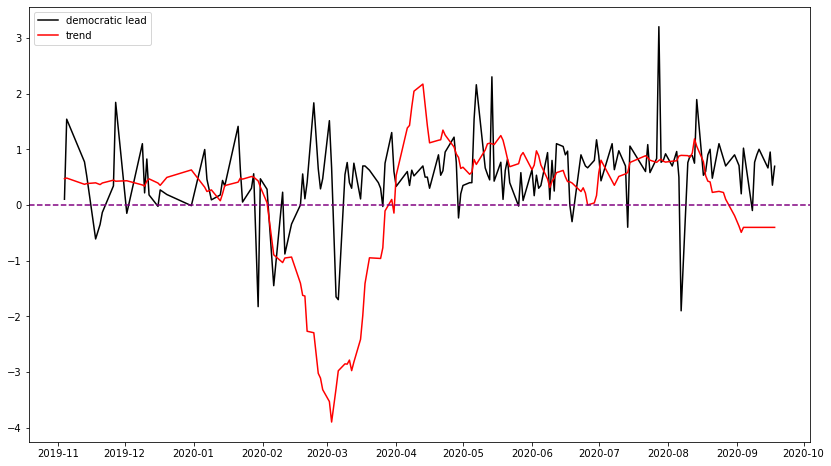

In [65]:
ax=plt.figure(figsize=(14,8))
ax.add_subplot(111)
plt.plot(model_data.index,model_data["dem_lead"],color="black", label ="democratic lead")
plt.plot(model_data.index,model_data["trend"],color="r",label ="trend")
plt.axhline(y=0, color='purple', linestyle='--')

plt.legend(loc = "upper left")



In [66]:
def make_scatter_plot(data,
                      x_name,
                      y_name,
                      xlim = None,
                      ylim = None):
    
    fig = plt.figure(figsize = (10, 6))
    
    ax = fig.add_subplot(111)
    ax.scatter(data[x_name], data[y_name], alpha = 0.2)
    
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.autoscale(False)
    
    ax.vlines(0, -10, 10, color = "grey")
    ax.hlines(0, -10, 10, color = "grey")
    
    ax.plot((-10, 10), (-10, 10), color = "red") 
    
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)

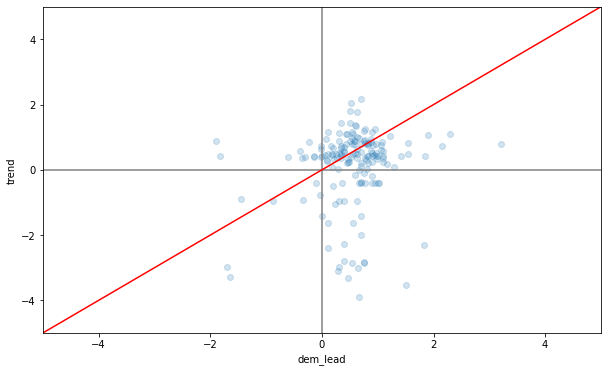

In [67]:
make_scatter_plot(model_data, "dem_lead","trend", xlim = (-5, 5), ylim = (-5, 5))
plt.savefig('lead_trend.png', dpi = 300)

In [68]:
import seaborn as sns

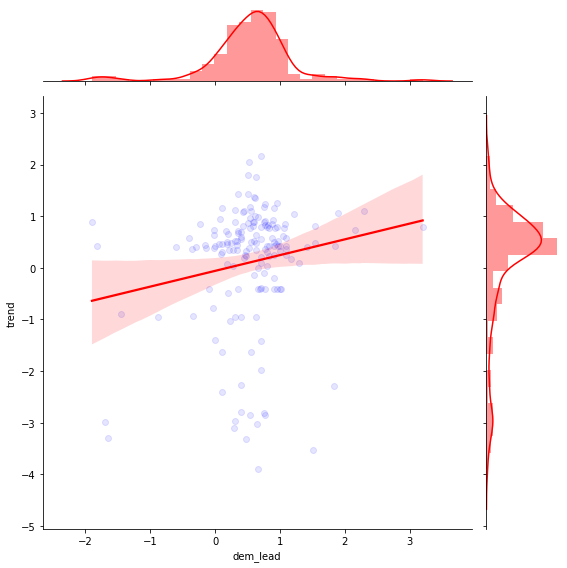

In [69]:
sns.jointplot(x="dem_lead", y="trend", data=model_data, kind = "reg", color = "red",
              scatter_kws={"alpha":0.10, "color": "blue"}, line_kws={"color": "red"},
              height = 8)

In [70]:
model_data_corrs =model_data.corr()
model_data_corrs

dem_lead     trend
dem_lead  1.000000  0.167335
trend     0.167335  1.000000

In [71]:
model_data=model_data.reset_index()
model_data_fromay=model_data[80:]

In [72]:
import statsmodels.api as smd
model_1= smd.OLS(model_data["dem_lead"],model_data["trend"]).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:               dem_lead   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              5.822
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                      0.0169
Time:                        12:27:48   Log-Likelihood:                         -201.99
No. Observations:                 164   AIC:                                      406.0
Df Residuals:                     163   BIC:                                      409.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [75]:
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm

y=model_data["trend"]
x=model_data["dem_lead"]
x=np.array(x)
x=x.reshape(-1,1)
y=np.array(y)
y=y.reshape(-1,1)
poly_reg =sp.PolynomialFeatures(degree=5)
x_ploy =poly_reg.fit_transform(x)
lin_reg_2=lm.LinearRegression()
lin_reg_2.fit(x_ploy,y)

print('model_2 Cofficients:',lin_reg_2.coef_)
print('model_2 intercept',lin_reg_2.intercept_)

model_2 Cofficients: [[ 0.          0.71891135 -0.88284751  0.05315873  0.24082978 -0.0581833 ]]
model_2 intercept [0.04926645]


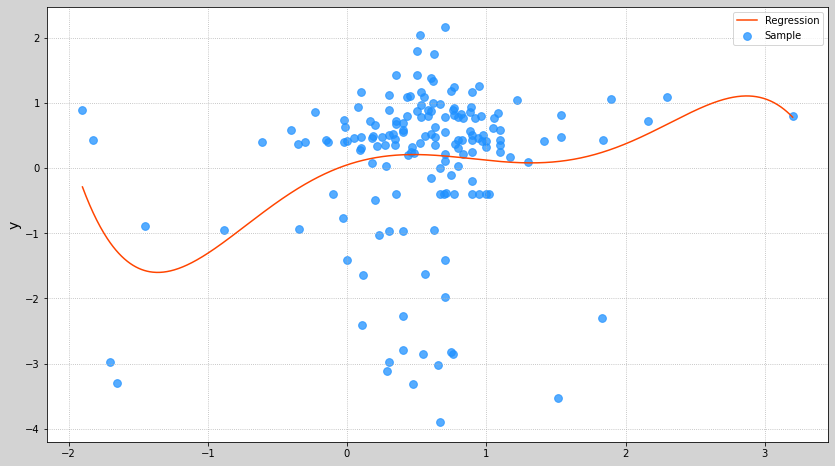

mean sbsolute error: 0.8161967888712324
mean squared error: 1.3273445398090566
median absolute error: 0.5917705837381823
model_2 R-squared: 0.051650762315353704


In [76]:


y=model_data["trend"]
x=model_data["dem_lead"]
x=np.array(x)
x=x.reshape(-1,1)
y=np.array(y)
y=y.reshape(-1,1)
model_2 = pl.make_pipeline(sp.PolynomialFeatures(5), lm.LinearRegression())    

model_2.fit(x, y)

pred_y = model_2.predict(x)
test_x = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
pred_test_y = model_2.predict(test_x)
plt.figure('Polynomial Regression', facecolor='lightgray',figsize=(14,8))
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.scatter(x, y, c='dodgerblue', alpha=0.75, s=60, label='Sample')
plt.plot(test_x, pred_test_y, c='orangered', label='Regression')
plt.legend()
plt.show()

print("mean sbsolute error:", sm.mean_absolute_error(y, pred_y))
print("mean squared error:", sm.mean_squared_error(y, pred_y))
print("median absolute error:", sm.median_absolute_error(y, pred_y))
print("model_2 R-squared:", sm.r2_score(y, pred_y))



## (3) COVID Data- Global and US infection rates  

This segment looks at COVID data as a possible confounder element.  
As explained above, our target time-frame for analysis is 1 May 2020.  
We computed the daily percentage change on COVID from 1 May 2020.  
From the results below, we can see that COVID's incremental changes from May 2020 has pretty much flatlined.  

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

%matplotlib inline

from datetime import date
from datetime import datetime
import dateutil.parser

In [78]:
Global_COVID = pd.read_csv("COVID_JohnHopkins.csv") # Data extracted on 18 Sept 2020.
Global_COVID.tail(20)

date     World  Afghanistan  Albania  Algeria  Andorra  Angola  \
242  2020-08-29  24761565      38140.0   9195.0  43403.0   1124.0  2471.0   
243  2020-08-30  25030576      38143.0   9279.0  43782.0   1124.0  2551.0   
244  2020-08-31  25275800      38162.0   9380.0  44146.0   1124.0  2624.0   
245  2020-09-01  25518306      38196.0   9513.0  44494.0   1176.0  2624.0   
246  2020-09-02  25786856      38205.0   9606.0  44833.0   1184.0  2654.0   
247  2020-09-03  26069995      38243.0   9728.0  45158.0   1199.0  2729.0   
248  2020-09-04  26348830      38288.0   9844.0  45469.0   1199.0  2777.0   
249  2020-09-05  26642277      38304.0   9967.0  45773.0   1215.0  2805.0   
250  2020-09-06  26922002      38324.0  10102.0  46071.0   1215.0  2876.0   
251  2020-09-07  27170635      38398.0  10255.0  46364.0   1215.0  2935.0   
252  2020-09-08  27377015      38494.0  10406.0  46653.0   1261.0  2965.0   
253  2020-09-09  27621636      38520.0  10553.0  46938.0   1261.0  2981.0   
254  2020-09-10  27904268      38544.0  10704.0  47216.0   1301.0  3033.0   
255  2020-09-11  28214424      38572.0  10860.0  47488.0   1301.0  3092.0   
256  2020-09-12  28519619      38606.0  11021.0  47752.0   1344.0  3217.0   
257  2020-09-13  28806609      38641.0  11185.0  48007.0   1344.0  3279.0   
258  2020-09-14  29079186      38716.0  11353.0  48254.0   1344.0  3335.0   
259  2020-09-15  29321328      38815.0  11520.0  48496.0   1438.0  3388.0   
260  2020-09-16  29623970      38855.0  11672.0  48734.0   1438.0  3439.0   
261  2020-09-17  29902487      38872.0  11816.0  48966.0   1438.0  3569.0   

     Anguilla  Antigua and Barbuda  Argentina  ...  \
242       3.0                 94.0   380279.0  ...   
243       3.0                 94.0   392009.0  ...   
244       3.0                 94.0   401226.0  ...   
245       3.0                 94.0   408413.0  ...   
246       3.0                 94.0   417722.0  ...   
247       3.0                 94.0   428226.0  ...   
248       3.0                 95.0   439159.0  ...   
249       3.0                 95.0   451185.0  ...   
250       3.0                 95.0   461869.0  ...   
251       3.0                 95.0   471793.0  ...   
252       3.0                 95.0   478779.0  ...   
253       3.0                 95.0   487994.0  ...   
254       3.0                 95.0   500021.0  ...   
255       3.0                 95.0   512280.0  ...   
256       3.0                 95.0   524185.0  ...   
257       3.0                 95.0   535690.0  ...   
258       3.0                 95.0   546468.0  ...   
259       3.0                 95.0   555524.0  ...   
260       3.0                 95.0   565432.0  ...   
261       3.0                 95.0   577325.0  ...   

     United States Virgin Islands  Uruguay  Uzbekistan  Vatican  Venezuela  \
242                        1075.0   1556.0     40953.0     12.0    43879.0   
243                        1129.0   1570.0     41303.0     12.0    44946.0   
244                        1134.0   1585.0     41651.0     12.0    45868.0   
245                        1139.0   1595.0     41994.0     12.0    45868.0   
246                        1143.0   1611.0     42370.0     12.0    47756.0   
247                        1144.0   1626.0     42540.0     12.0    48883.0   
248                        1150.0   1636.0     42905.0     12.0    49877.0   
249                        1150.0   1653.0     42998.0     12.0    50973.0   
250                        1167.0   1669.0     43476.0     12.0    52165.0   
251                        1181.0   1679.0     43775.0     12.0    53289.0   
252                        1190.0   1693.0     44107.0     12.0    54350.0   
253                        1191.0   1712.0     44557.0     12.0    55563.0   
254                        1197.0   1741.0     45160.0     12.0    56751.0   
255                        1201.0   1759.0     45927.0     12.0    57823.0   
256                        1201.0   1773.0     46498.0     12.0    58663.0   
257       

In [79]:
Global_COVID.columns.unique()

Index(['date', 'World', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vatican',
       'Venezuela', 'Vietnam', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=212)

In [80]:
Global_COVID = Global_COVID.set_index("date")
Global_COVID

World  Afghanistan  Albania  Algeria  Andorra  Angola  \
date                                                                   
2019-12-31        27          0.0      NaN      0.0      NaN     NaN   
2020-01-01        27          0.0      NaN      0.0      NaN     NaN   
2020-01-02        27          0.0      NaN      0.0      NaN     NaN   
2020-01-03        44          0.0      NaN      0.0      NaN     NaN   
2020-01-04        44          0.0      NaN      0.0      NaN     NaN   
2020-01-05        59          0.0      NaN      0.0      NaN     NaN   
2020-01-06        59          0.0      NaN      0.0      NaN     NaN   
2020-01-07        59          0.0      NaN      0.0      NaN     NaN   
2020-01-08        59          0.0      NaN      0.0      NaN     NaN   
2020-01-09        59          0.0      NaN      0.0      NaN     NaN   
2020-01-10        59          0.0      NaN      0.0      NaN     NaN   
2020-01-11        59          0.0      NaN      0.0      NaN     NaN   
2020-01-12        59          0.0      NaN      0.0      NaN     NaN   
2020-01-13        60          0.0      NaN      0.0      NaN     NaN   
2020-01-14        60          0.0      NaN      0.0      NaN     NaN   
2020-01-15        61          0.0      NaN      0.0      NaN     NaN   
2020-01-16        61          0.0      NaN      0.0      NaN     NaN   
2020-01-17        66          0.0      NaN      0.0      NaN     NaN   
2020-01-18        83          0.0      NaN      0.0      NaN     NaN   
2020-01-19       219          0.0      NaN      0.0      NaN     NaN   
2020-01-20       239          0.0      NaN      0.0      NaN     NaN   
2020-01-21       392          0.0      NaN      0.0      NaN     NaN   
2020-01-22       534          0.0      NaN      0.0      NaN     NaN   
2020-01-23       631          0.0      NaN      0.0      NaN     NaN   
2020-01-24       897          0.0      NaN      0.0      NaN     NaN   
2020-01-25      1350          0.0      NaN      0.0      NaN     NaN   
2020-01-26      2023          0.0      NaN      0.0      NaN     NaN   
2020-01-27      2820          0.0      NaN      0.0      NaN     NaN   
2020-01-28      4587          0.0      NaN      0.0      NaN     NaN   
2020-01-29      6067          0.0      NaN      0.0      NaN     NaN   
2020-01-30      7823          0.0      NaN      0.0      NaN     NaN   
2020-01-31      9824          0.0      NaN      0.0      NaN     NaN   
2020-02-01     11946          0.0      NaN      0.0      NaN     NaN   
2020-02-02     14554          0.0      NaN      0.0      NaN     NaN   
2020-02-03     17372          0.0      NaN      0.0      NaN     NaN   
2020-02-04     20615          0.0      NaN      0.0      NaN     NaN   
2020-02-05     24523          0.0      NaN      0.0      NaN     NaN   
2020-02-06     28274          0.0      NaN      0.0      NaN     NaN   
2020-02-07     31492          0.0      NaN      0.0      NaN     NaN   
2020-02-08     34934          0.0      NaN      0.0      NaN     NaN   
2020-02-09     37552          0.0      NaN      0.0      NaN     NaN   
2020-02-10     40544          0.0      NaN      0.0      NaN     NaN   
2020-02-11     43106          0.0      NaN      0.0      NaN     NaN   
2020-02-12     45178          0.0      NaN      0.0      NaN     NaN   
2020-02-13     60329          0.0      NaN      0.0      NaN     NaN   
2020-02-14     64544          0.0      NaN      0.0      NaN     NaN   
2020-02-15     67104          0.0      NaN      0.0      NaN     NaN   
2020-02-16     69266          0.0      NaN      0.0      NaN     NaN   
2020-02-17     71333          0.0      NaN      0.0      NaN     NaN   
2020-02-18     73328          0.0      NaN      0.0      NaN     NaN   
2020-02-19     75192          0.0      NaN      0.0      NaN     NaN   
2020-02-20     75724          0.0      NaN      0.0      NaN     NaN   
2020-02-21     76720          0.0      NaN      0.0      NaN     NaN   
2020-02-22     77805          0.0      NaN      0.0    

In [81]:
World_US = Global_COVID[["World","United States","United States Virgin Islands"]]
World_US.tail(10)

World  United States  United States Virgin Islands
date                                                             
2020-09-08  27377015        6300671                        1190.0
2020-09-09  27621636        6327793                        1191.0
2020-09-10  27904268        6359720                        1197.0
2020-09-11  28214424        6397227                        1201.0
2020-09-12  28519619        6445288                        1201.0
2020-09-13  28806609        6486108                        1220.0
2020-09-14  29079186        6519979                        1220.0
2020-09-15  29321328        6554820                        1221.0
2020-09-16  29623970        6606293                        1232.0
2020-09-17  29902487        6630891                        1238.0

In [82]:
World_US["United States Virgin Islands"] = World_US["United States Virgin Islands"].fillna(0)

<ipython-input-82-75c88b677a44>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
World_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 2019-12-31 to 2020-09-17
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   World                         262 non-null    int64  
 1   United States                 262 non-null    int64  
 2   United States Virgin Islands  262 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.2+ KB


In [84]:
World_US["US"] = World_US["United States Virgin Islands"] + World_US["United States"]

<ipython-input-84-6f4a05e18378>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
World_US.columns.unique()

Index(['World', 'United States', 'United States Virgin Islands', 'US'], dtype='object')

In [86]:
World_US.tail()

World  United States  United States Virgin Islands         US
date                                                                        
2020-09-13  28806609        6486108                        1220.0  6487328.0
2020-09-14  29079186        6519979                        1220.0  6521199.0
2020-09-15  29321328        6554820                        1221.0  6556041.0
2020-09-16  29623970        6606293                        1232.0  6607525.0
2020-09-17  29902487        6630891                        1238.0  6632129.0

In [87]:
pct_World_US = World_US.pct_change()
pct_World_US

World  United States  United States Virgin Islands        US
date                                                                       
2019-12-31       NaN            NaN                           NaN       NaN
2020-01-01  0.000000            NaN                           NaN       NaN
2020-01-02  0.000000            NaN                           NaN       NaN
2020-01-03  0.629630            NaN                           NaN       NaN
2020-01-04  0.000000            NaN                           NaN       NaN
2020-01-05  0.340909            NaN                           NaN       NaN
2020-01-06  0.000000            NaN                           NaN       NaN
2020-01-07  0.000000            NaN                           NaN       NaN
2020-01-08  0.000000            NaN                           NaN       NaN
2020-01-09  0.000000            NaN                           NaN       NaN
2020-01-10  0.000000            NaN                           NaN       NaN
2020-01-11  0.000000            NaN                           NaN       NaN
2020-01-12  0.000000            NaN                           NaN       NaN
2020-01-13  0.016949            NaN                           NaN       NaN
2020-01-14  0.000000            NaN                           NaN       NaN
2020-01-15  0.016667            NaN                           NaN       NaN
2020-01-16  0.000000            NaN                           NaN       NaN
2020-01-17  0.081967            NaN                           NaN       NaN
2020-01-18  0.257576            NaN                           NaN       NaN
2020-01-19  1.638554            NaN                           NaN       NaN
2020-01-20  0.091324            NaN                           NaN       NaN
2020-01-21  0.640167            inf                           NaN       inf
2020-01-22  0.362245       0.000000                           NaN  0.000000
2020-01-23  0.181648       0.000000                           NaN  0.000000
2020-01-24  0.421553       0.000000                           NaN  0.000000
2020-01-25  0.505017       1.000000                           NaN  1.000000
2020-01-26  0.498519       0.000000                           NaN  0.000000
2020-01-27  0.393969       1.500000                           NaN  1.500000
2020-01-28  0.626596       0.000000                           NaN  0.000000
2020-01-29  0.322651       0.000000                           NaN  0.000000
2020-01-30  0.289435       0.000000                           NaN  0.000000
2020-01-31  0.255784       0.200000                           NaN  0.200000
2020-02-01  0.216002       0.166667                           NaN  0.166667
2020-02-02  0.218316       0.142857                           NaN  0.142857
2020-02-03  0.193624       0.375000                           NaN  0.375000
2020-02-04  0.186680       0.000000                           NaN  0.000000
2020-02-05  0.189571       0.000000                           NaN  0.000000
2020-02-06  0.152958       0.090909                           NaN  0.090909
2020-02-07  0.113815       0.000000                           NaN  0.000000
2020-02-08  0.109298       0.000000                           NaN  0.000000
2020-02-09  0.074941       0.000000                           NaN  0.000000
2020-02-10  0.079676       0.000000                           NaN  0.000000
2020-02-11  0.063191       0.083333                           NaN  0.083333
2020-02-12  0.048068       0.000000                           NaN  0.000000
2020-02-13  0.335362       0.076923                           NaN  0.076923
2020-02-14  0.069867       0.071429                           NaN  0.071429
2020-02-15  0.039663       0.000000                           NaN  0.000000
2020-02-16  0.032219       0.000000                           NaN  0.000000
2020-02-17  0.029841       0.000000                           NaN  0.000000
2020-02-18  0.027967       0.000000                           NaN  0.000000
2020-02-19  0.025420       0.000000                           N

In [88]:
#World_US_pct = pct_World_US.fillna(0)
pct_World_US.fillna(0)
pct_World_US

World  United States  United States Virgin Islands        US
date                                                                       
2019-12-31       NaN            NaN                           NaN       NaN
2020-01-01  0.000000            NaN                           NaN       NaN
2020-01-02  0.000000            NaN                           NaN       NaN
2020-01-03  0.629630            NaN                           NaN       NaN
2020-01-04  0.000000            NaN                           NaN       NaN
2020-01-05  0.340909            NaN                           NaN       NaN
2020-01-06  0.000000            NaN                           NaN       NaN
2020-01-07  0.000000            NaN                           NaN       NaN
2020-01-08  0.000000            NaN                           NaN       NaN
2020-01-09  0.000000            NaN                           NaN       NaN
2020-01-10  0.000000            NaN                           NaN       NaN
2020-01-11  0.000000            NaN                           NaN       NaN
2020-01-12  0.000000            NaN                           NaN       NaN
2020-01-13  0.016949            NaN                           NaN       NaN
2020-01-14  0.000000            NaN                           NaN       NaN
2020-01-15  0.016667            NaN                           NaN       NaN
2020-01-16  0.000000            NaN                           NaN       NaN
2020-01-17  0.081967            NaN                           NaN       NaN
2020-01-18  0.257576            NaN                           NaN       NaN
2020-01-19  1.638554            NaN                           NaN       NaN
2020-01-20  0.091324            NaN                           NaN       NaN
2020-01-21  0.640167            inf                           NaN       inf
2020-01-22  0.362245       0.000000                           NaN  0.000000
2020-01-23  0.181648       0.000000                           NaN  0.000000
2020-01-24  0.421553       0.000000                           NaN  0.000000
2020-01-25  0.505017       1.000000                           NaN  1.000000
2020-01-26  0.498519       0.000000                           NaN  0.000000
2020-01-27  0.393969       1.500000                           NaN  1.500000
2020-01-28  0.626596       0.000000                           NaN  0.000000
2020-01-29  0.322651       0.000000                           NaN  0.000000
2020-01-30  0.289435       0.000000                           NaN  0.000000
2020-01-31  0.255784       0.200000                           NaN  0.200000
2020-02-01  0.216002       0.166667                           NaN  0.166667
2020-02-02  0.218316       0.142857                           NaN  0.142857
2020-02-03  0.193624       0.375000                           NaN  0.375000
2020-02-04  0.186680       0.000000                           NaN  0.000000
2020-02-05  0.189571       0.000000                           NaN  0.000000
2020-02-06  0.152958       0.090909                           NaN  0.090909
2020-02-07  0.113815       0.000000                           NaN  0.000000
2020-02-08  0.109298       0.000000                           NaN  0.000000
2020-02-09  0.074941       0.000000                           NaN  0.000000
2020-02-10  0.079676       0.000000                           NaN  0.000000
2020-02-11  0.063191       0.083333                           NaN  0.083333
2020-02-12  0.048068       0.000000                           NaN  0.000000
2020-02-13  0.335362       0.076923                           NaN  0.076923
2020-02-14  0.069867       0.071429                           NaN  0.071429
2020-02-15  0.039663       0.000000                           NaN  0.000000
2020-02-16  0.032219       0.000000                           NaN  0.000000
2020-02-17  0.029841       0.000000                           NaN  0.000000
2020-02-18  0.027967       0.000000                           NaN  0.000000
2020-02-19  0.025420       0.000000                           N

In [89]:
#World_US_pct[["World","US"]].plot(figsize = (15,8))
#plt.legend(loc = "upper left")

In [90]:
pct_World_US.index = pd.to_datetime(pct_World_US.index)

In [91]:
pct_World_US.index

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09',
               ...
               '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
               '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
               '2020-09-16', '2020-09-17'],
              dtype='datetime64[ns]', name='date', length=262, freq=None)

In [92]:
##World_US_pct[["World","US"]].plot(figsize = (15,8))

Text(2020-06-02, 0.6, 'From May - Daily Increase Percentage Flatten')

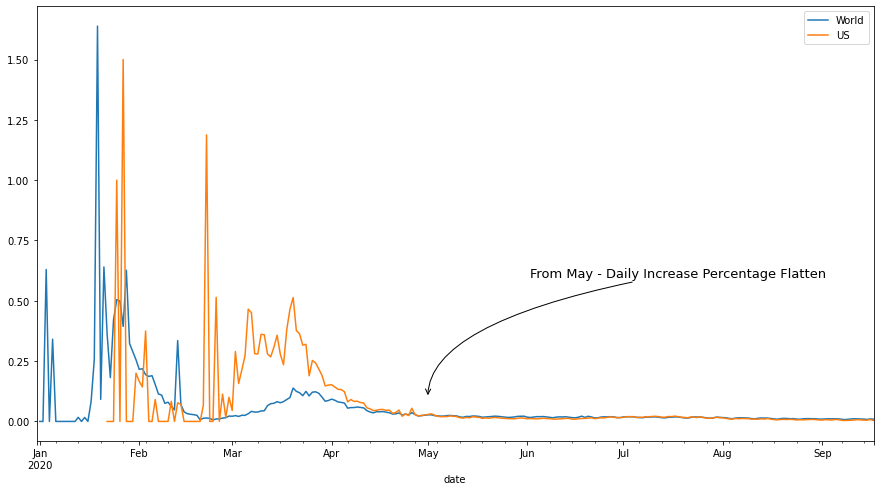

In [93]:
Explain_pct = pct_World_US[["World","US"]].plot(figsize = (15,8))
Explain_pct.annotate("From May - Daily Increase Percentage Flatten",xy=("2020-05-01",0.10),xytext=("2020-06-02",0.6),size=13,arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=10,angleB=90"))
#Explain_pct.annotate("reasonable logic start point",xy=("2020-05",1),xytext=("2020-06",-1),size=13,arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

`From the above, we can rule out COVID as a signficant confounder.`

## References

(Site for CSV file for COVID infection rates) https://ourworldindata.org/coronavirus-source-data  
Find and put in the parent link from John Hopkins

## Appendix

## Contribution Statements